In [20]:
import numpy as np
import pandas as pd

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('data/911.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [25]:
df['zip'].value_counts().head(5)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

In [26]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

In [27]:
df['title'].nunique(5)

148

In [28]:
x=df['title'].iloc[0]

In [29]:
x.split(':')

['EMS', ' BACK PAINS/INJURY']

In [30]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])

In [31]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [32]:
df['Reason'].value_counts()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

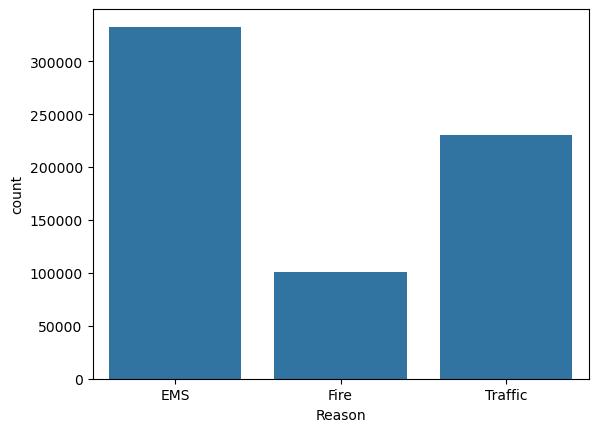

In [33]:
sns.countplot(x=df['Reason'],data=df)
plt.show()

In [34]:
type(df['timeStamp'][0])

str

In [35]:
date=pd.to_datetime(df['timeStamp'])
date

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

In [36]:
date[0].hour

17

In [37]:
df['Hour']=date.apply(lambda x: x.hour)
df['Month']=date.apply(lambda x: x.month)
df['DayOfWeek']=date.apply(lambda x: x.dayofweek)

In [38]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [39]:
df['DayOfWeek'] = df['DayOfWeek'].map(dmap)

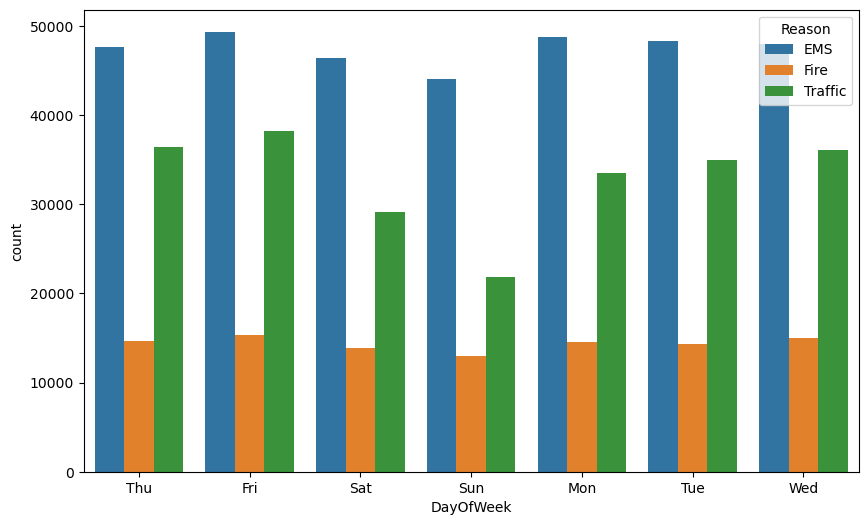

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='DayOfWeek', data=df,hue='Reason')
plt.show()

In [46]:
sns.countplot(x=df['Month'], data=df,hue='Reason')

<Axes: xlabel='Month', ylabel='count'>

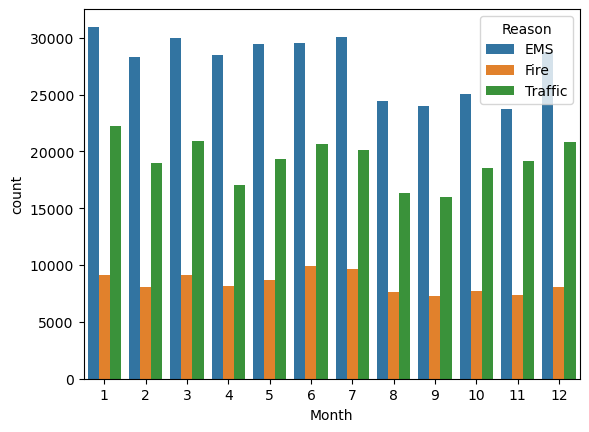

In [47]:
plt.show()